In [1]:
import pandas as pd

# Cargar el archivo
df = pd.read_csv("consumo_hogar.csv")

# Mostrar las primeras filas
print(df.head())

# Información general
print(df.info())

# Estadísticas descriptivas
print(df.describe())


   Temperatura  Personas  Electrodomesticos  Consumo_kWh
0    17.031843       1.0                5.0    24.201688
1    16.682996       5.0               16.0    58.791874
2    18.809620       1.0               16.0    43.980728
3    27.307943       5.0               15.0    65.844665
4    21.212979       1.0                5.0    26.575071
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64806 entries, 0 to 64805
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperatura        61566 non-null  float64
 1   Personas           61566 non-null  float64
 2   Electrodomesticos  61566 non-null  float64
 3   Consumo_kWh        61566 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB
None
        Temperatura      Personas  Electrodomesticos   Consumo_kWh
count  61566.000000  61566.000000       61566.000000  61566.000000
mean      21.961768      2.995793          12.496215     50.475457
std        5.008

In [2]:
print(df.isnull().sum())


Temperatura          3240
Personas             3240
Electrodomesticos    3240
Consumo_kWh          3240
dtype: int64


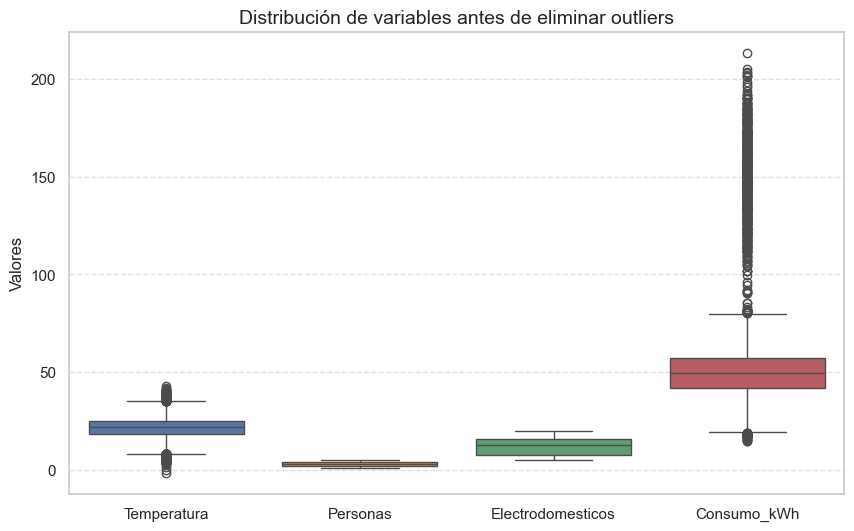

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualizar valores atípicos con boxplots ---
plt.figure(figsize=(10,6))

sns.boxplot(data=df[["Temperatura", "Personas", "Electrodomesticos", "Consumo_kWh"]])

plt.title("Distribución de variables antes de eliminar outliers", fontsize=14)
plt.ylabel("Valores")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



In [ ]:
df.dropna(inplace=True)


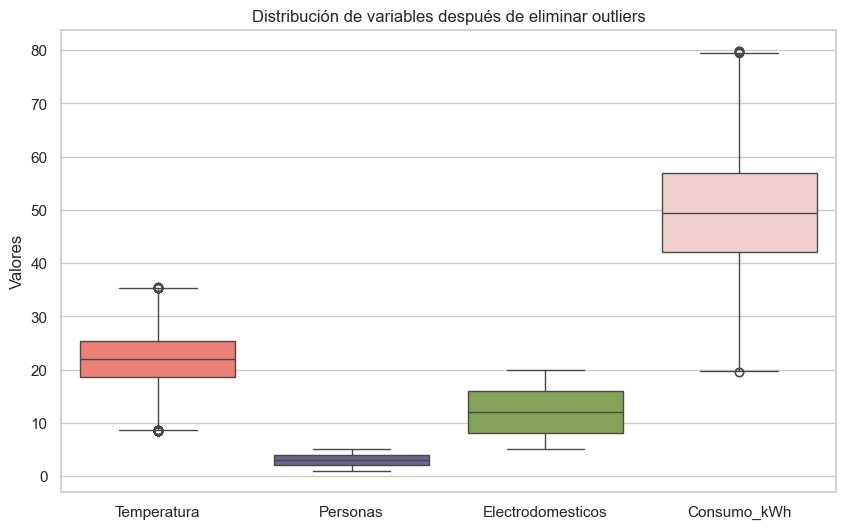

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables que queremos analizar
columnas = ["Temperatura", "Personas", "Electrodomesticos", "Consumo_kWh"]

# Copiamos el DataFrame para no alterar el original
df_clean = df[columnas].copy()

# Función para eliminar outliers usando IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Aplicar la limpieza
df_clean = remove_outliers_iqr(df_clean, columnas)

# Boxplot después de eliminar outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, palette=["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9"])
plt.title("Distribución de variables después de eliminar outliers")
plt.ylabel("Valores")
plt.show()


In [33]:
print(df.isnull().sum())  # todo debe dar 0
print(df.describe())      # valores más coherentes



Temperatura          0
Personas             0
Electrodomesticos    0
Consumo_kWh          0
dtype: int64
        Temperatura      Personas  Electrodomesticos   Consumo_kWh
count  52797.000000  52797.000000       52797.000000  52797.000000
mean      21.965162      2.996193          12.497831     50.493566
std        5.000193      1.413103           4.607520     14.537380
min       -1.278053      1.000000           5.000000     14.732408
25%       18.594258      2.000000           8.000000     42.102561
50%       21.959496      3.000000          13.000000     49.559763
75%       25.335091      4.000000          16.000000     57.281445
max       42.931879      5.000000          20.000000    213.321022


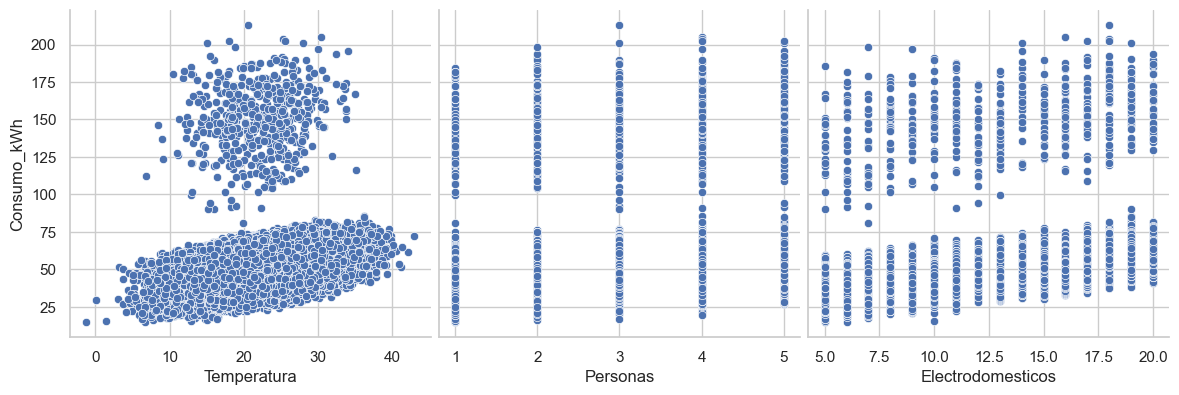

In [34]:
sns.pairplot(df, x_vars=["Temperatura","Personas","Electrodomesticos"], y_vars="Consumo_kWh", height=4)
plt.show()



🔹 REGRESIÓN LINEAL MÚLTIPLE
Coeficientes: [0.85906825 3.1853762  1.71586828]
Intercepto: 0.6360672385573096
MSE: 109.24
R²: 0.480


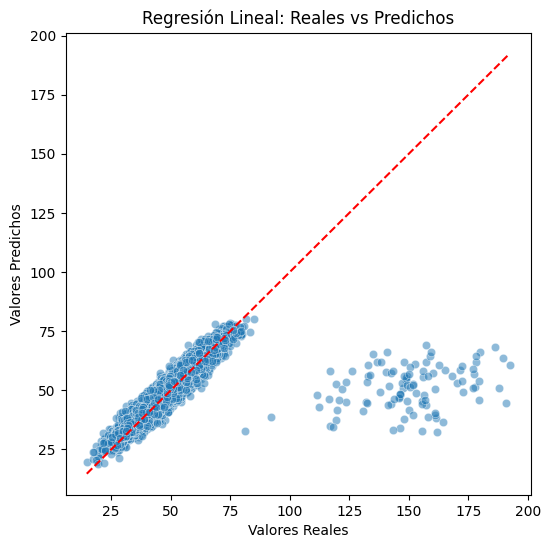

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Variables
X = df[["Temperatura", "Personas", "Electrodomesticos"]]
y = df["Consumo_kWh"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Predicciones
y_pred_lin = modelo_lineal.predict(X_test)

# Métricas
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("🔹 REGRESIÓN LINEAL MÚLTIPLE")
print("Coeficientes:", modelo_lineal.coef_)
print("Intercepto:", modelo_lineal.intercept_)
print(f"MSE: {mse_lin:.2f}")
print(f"R²: {r2_lin:.3f}")

# --- GRAFICA DE RESULTADOS ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lin, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Regresión Lineal: Reales vs Predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


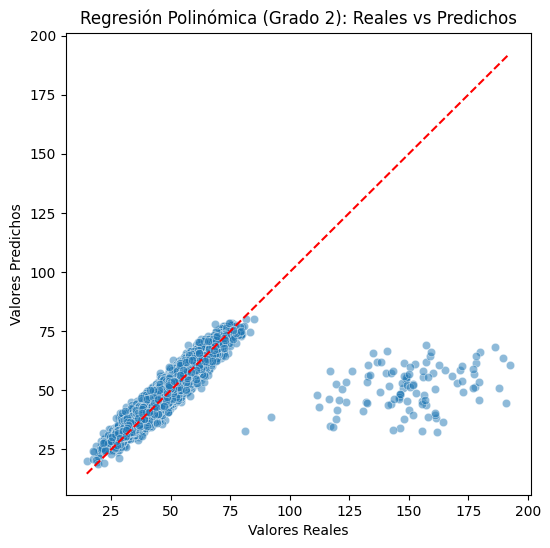

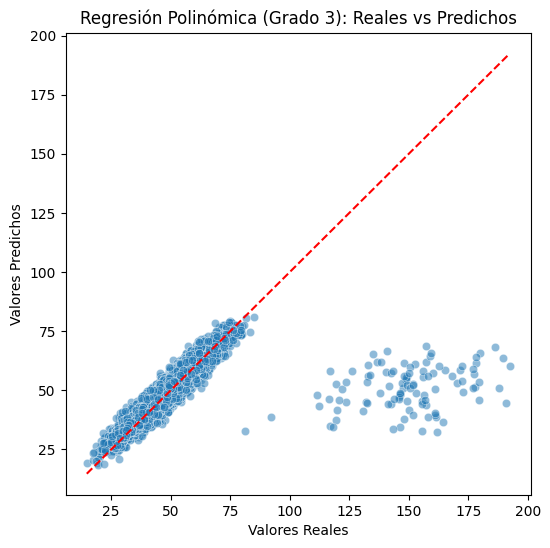

   Grado         MSE        R²
0      2  109.249223  0.479689
1      3  109.284083  0.479523


In [14]:
from sklearn.preprocessing import PolynomialFeatures

resultados = []

for grado in [2, 3]:
    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X)
    
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    modelo_poly = LinearRegression()
    modelo_poly.fit(X_train_p, y_train_p)
    y_pred_p = modelo_poly.predict(X_test_p)
    
    mse_p = mean_squared_error(y_test_p, y_pred_p)
    r2_p = r2_score(y_test_p, y_pred_p)
    
    resultados.append((grado, mse_p, r2_p))
    
    # --- GRAFICA DE RESULTADOS POR MODELO ---
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_test_p, y=y_pred_p, alpha=0.5)
    plt.xlabel("Valores Reales")
    plt.ylabel("Valores Predichos")
    plt.title(f"Regresión Polinómica (Grado {grado}): Reales vs Predichos")
    plt.plot([y_test_p.min(), y_test_p.max()], [y_test_p.min(), y_test_p.max()], 'r--')
    plt.show()

# Mostrar tabla comparativa
df_resultados = pd.DataFrame(resultados, columns=["Grado", "MSE", "R²"])
print(df_resultados)


C:\Users\pc\AppData\Local\Temp\ipykernel_27468\4233634624.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados, x="Modelo", y="R²", palette="Blues_d")


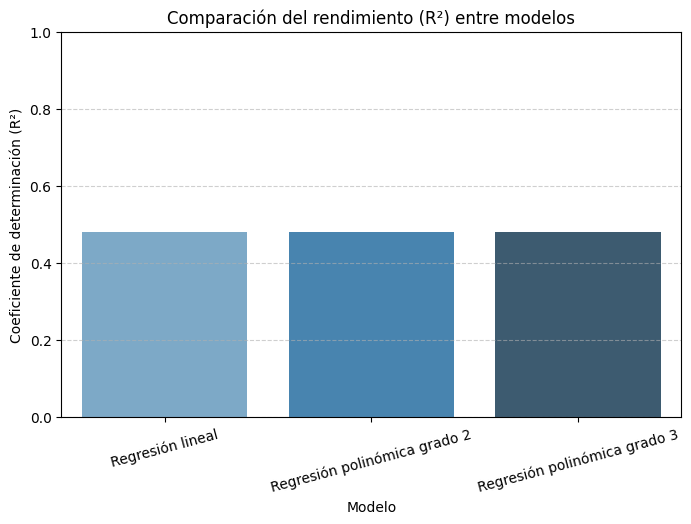

C:\Users\pc\AppData\Local\Temp\ipykernel_27468\4233634624.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados, x="Modelo", y="MSE", palette="Reds_d")


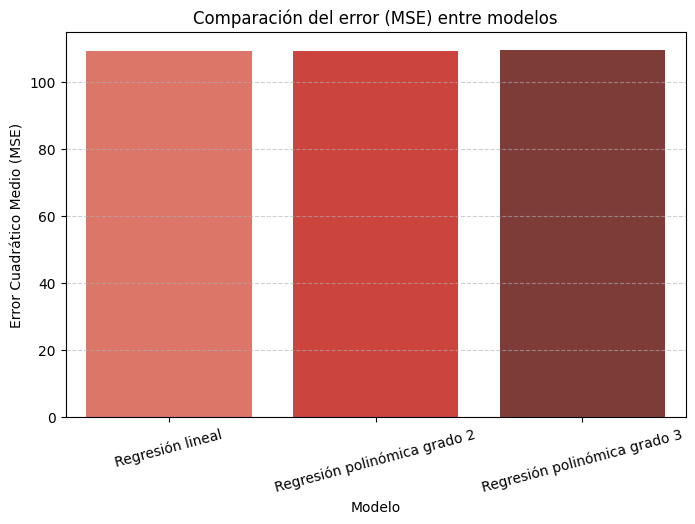


🔹 COMPARATIVA DE MODELOS 🔹

                         Modelo         MSE        R²
0              Regresión lineal  109.236910  0.479748
1  Regresión polinómica grado 2  109.249223  0.479689
2  Regresión polinómica grado 3  109.284083  0.479523


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener el DataFrame df_resultados con las columnas:
# ["Modelo", "MSE", "R²"]

# --- Gráfica 1: Comparación del R² ---
plt.figure(figsize=(8,5))
sns.barplot(data=df_resultados, x="Modelo", y="R²", palette="Blues_d")
plt.title("Comparación del rendimiento (R²) entre modelos")
plt.ylabel("Coeficiente de determinación (R²)")
plt.xlabel("Modelo")
plt.xticks(rotation=15)
plt.ylim(0, 1)  # el R² va de 0 a 1
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# --- Gráfica 2: Comparación del MSE ---
plt.figure(figsize=(8,5))
sns.barplot(data=df_resultados, x="Modelo", y="MSE", palette="Reds_d")
plt.title("Comparación del error (MSE) entre modelos")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.xlabel("Modelo")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
# Resumen final
# --- Modelo lineal ---
y_pred_lin = modelo_lineal.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# --- Modelo polinómico grado 2 ---
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_poly2, y, test_size=0.2, random_state=42)
modelo_poly2 = LinearRegression().fit(X_train2, y_train2)
y_pred_poly2 = modelo_poly2.predict(X_test2)
mse_poly2 = mean_squared_error(y_test2, y_pred_poly2)
r2_poly2 = r2_score(y_test2, y_pred_poly2)

# --- Modelo polinómico grado 3 ---
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_poly3, y, test_size=0.2, random_state=42)
modelo_poly3 = LinearRegression().fit(X_train3, y_train3)
y_pred_poly3 = modelo_poly3.predict(X_test3)
mse_poly3 = mean_squared_error(y_test3, y_pred_poly3)
r2_poly3 = r2_score(y_test3, y_pred_poly3)

# --- Tabla comparativa ---
df_resultados = pd.DataFrame({
    "Modelo": ["Regresión lineal", "Regresión polinómica grado 2", "Regresión polinómica grado 3"],
    "MSE": [mse_lin, mse_poly2, mse_poly3],
    "R²": [r2_lin, r2_poly2, r2_poly3]
})

print("\n🔹 COMPARATIVA DE MODELOS 🔹\n")
print(df_resultados)




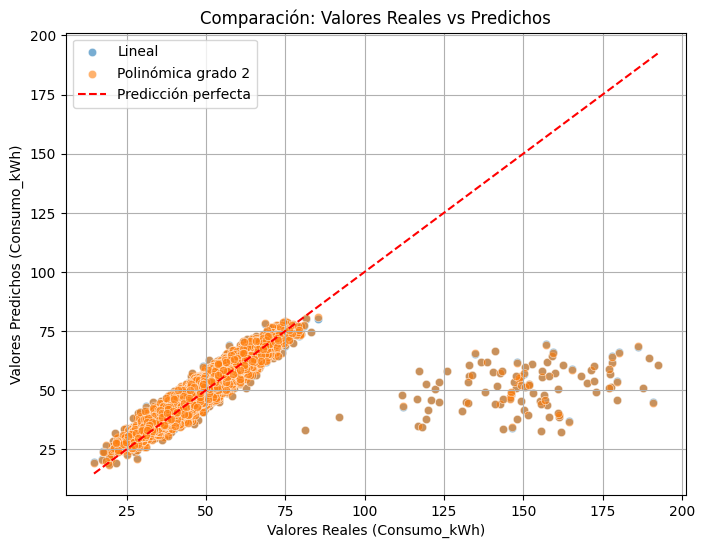

In [16]:
# Crear un DataFrame con los valores reales y predichos de cada modelo
resultados_finales = pd.DataFrame({
    "Reales": y_test.reset_index(drop=True),
    "Lineal": y_pred_lin,
    "Polinómica_2": y_pred_p if 'y_pred_p' in locals() else None,  # si ya corriste grado 2
})

# Si tienes también el modelo de grado 3, puedes agregarlo así:
# resultados_finales["Polinómica_3"] = y_pred_p3

# --- GRAFICA FINAL ---
plt.figure(figsize=(8,6))
sns.scatterplot(x="Reales", y="Lineal", data=resultados_finales, label="Lineal", alpha=0.6)
sns.scatterplot(x="Reales", y="Polinómica_2", data=resultados_finales, label="Polinómica grado 2", alpha=0.6)
# sns.scatterplot(x="Reales", y="Polinómica_3", data=resultados_finales, label="Polinómica grado 3", alpha=0.6)

# Línea de referencia perfecta (predicción ideal)
min_val = resultados_finales["Reales"].min()
max_val = resultados_finales["Reales"].max()
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Predicción perfecta")

plt.title("Comparación: Valores Reales vs Predichos")
plt.xlabel("Valores Reales (Consumo_kWh)")
plt.ylabel("Valores Predichos (Consumo_kWh)")
plt.legend()
plt.grid(True)
plt.show()